* https://jalcocert.github.io/JAlcocerT/dji-oa5pro-firmware-updates/#extracting-telemetry-data-from-gph9
* https://jalcocert.github.io/JAlcocerT/geospatial-data
* https://jalcocert.github.io/JAlcocerT/tinkering-telemetry-trackdays

```sh
sudo apt-get install libimage-exiftool-perl

exiftool -ee /home/jalcocert/Downloads/videomini/1.MP4 > output-1.txt #saves it on this directory

###alternatively...
#/usr/bin/exiftool -ee -G1 -json /home/jalcocert/Desktop/Karting/GX030390.MP4 > output.json
#/usr/bin/exiftool -a -ee -G1 -json /home/jalcocert/Desktop/Karting/GX030390.MP4 > output_all.json
```

In [ ]:
#choco install python -y
#choco install exiftool -y

#exiftool -ee ./GX020410.MP4 > output-kart-1-dec25.txt #here you will 

In [1]:
#Setup a Venv and try this:

import sys
print(sys.version)

3.10.12 (main, Nov  4 2025, 08:48:33) [GCC 11.4.0]


In [2]:
def extract_gps_speeds(file_path):
    gps_speeds = []  # List to store GPS Speed values
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Check if the line contains "GPS Speed"
                if "GPS Speed" in line:
                    # Split the line to extract the speed value
                    parts = line.strip().split(':')
                    if len(parts) == 2:
                        try:
                            # Convert the value to a float and store it
                            speed = float(parts[1].strip())
                            gps_speeds.append(speed)
                        except ValueError:
                            print(f"Could not parse GPS Speed from line: {line.strip()}")
        
        # Print all extracted GPS Speed values
        print("Extracted GPS Speeds:")
        for speed in gps_speeds:
            print(speed)
        
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to the file
#file_path = "./Data_GoPro/output-GX030390.txt"
#extract_gps_speeds(file_path)


In [3]:
#pip install matplotlib
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

Matplotlib version: 3.10.6


In [ ]:
#pip install plotly

In [4]:
import pandas as pd
print(pd.__version__)


2.3.2


In [5]:
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly

# Function to extract GPS Speed information from the file
def extract_gps_speeds(filename):
    with open(filename, 'r') as file:
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = [float(match) for match in re.findall(speed_pattern, content)]
    return speeds

# Plot a boxplot of the speed distribution using Plotly
def plot_speed_distribution(speeds):
    fig = go.Figure()

    # Add box plot to the figure
    fig.add_trace(go.Box(
        x=speeds,
        name="GPS Speeds",
        boxpoints="all",  # Show all points
        jitter=0.3,  # Spread out the points
        pointpos=-1.8,  # Position the points
        marker=dict(color="lightblue"),
        line=dict(color="darkblue")
    ))

    # Update layout
    fig.update_layout(
        title="GPS Speed Distribution",
        xaxis_title="Speed (m/s)",
        yaxis_title="",
        xaxis=dict(showgrid=True),
        yaxis=dict(showticklabels=False),
        template="plotly_white"
    )

    fig.show()

# Main execution
if __name__ == "__main__":
    # Display the Plotly version
    print(f"Plotly version: {plotly.__version__}")

    filename = "output-2.txt"
    gps_speeds = extract_gps_speeds(filename)
    print(f"Extracted {len(gps_speeds)} GPS speeds.")
    plot_speed_distribution(gps_speeds)


Plotly version: 5.18.0
Extracted 7414 GPS speeds.


In [9]:
def extract_gps_speeds(filename):
    with open(filename, 'r', encoding='utf-16-le') as file:  # Changed encoding to 'utf-16-le'
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = re.findall(speed_pattern, content)
    
    # Convert string speeds to float
    return [float(speed) for speed in speeds]

In [14]:
import numpy as np

def calculate_speed_statistics(gps_speeds):
    """
    Calculates and prints speed statistics (max, average, median) in km/h.
    Assumes input speeds are already in kilometers per hour (km/h).

    Args:
        gps_speeds: A list or NumPy array of speed values in km/h.
    """
    speeds_array = np.array(gps_speeds)

    # Calculate statistics in km/h
    max_speed = speeds_array.max()
    avg_speed = speeds_array.mean()
    median_speed = np.median(speeds_array)

    # Print results
    print(f"Max Speed: {max_speed:.2f} km/h")
    print(f"Average Speed: {avg_speed:.2f} km/h")
    print(f"Median Speed: {median_speed:.2f} km/h")

# Example usage:
if __name__ == "__main__":

    filename = "output-kart-1-dec25.txt"
    gps_speeds = extract_gps_speeds(filename)
    
    #gps_speeds = [10, 15, 20, 12, 18, 25, 14]  # Example speed values in m/s
    calculate_speed_statistics(gps_speeds)

Max Speed: 82.79 km/h
Average Speed: 55.89 km/h
Median Speed: 56.14 km/h


In [16]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def plot_speeds(gps_speeds, start_time=None, time_interval=1):
    """
    Plots GPS speeds over time or index.
    
    Args:
        gps_speeds: List of speed values in km/h
        start_time: (Optional) datetime object for the first data point.
                   If None, uses index numbers on x-axis.
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    plt.figure(figsize=(12, 6))
    
    if start_time:
        # Create time points
        times = [start_time + timedelta(seconds=i*time_interval) 
                for i in range(len(gps_speeds))]
        plt.plot(times, gps_speeds, '-o', markersize=3)
        plt.xlabel('Time')
        plt.gcf().autofmt_xdate()  # Auto-format time labels
    else:
        # Use index if no time information
        plt.plot(gps_speeds, '-o', markersize=3)
        plt.xlabel('Measurement Index')
    
    plt.ylabel('Speed (km/h)')
    plt.title('Speed Over Time' if start_time else 'Speed vs Measurement Index')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

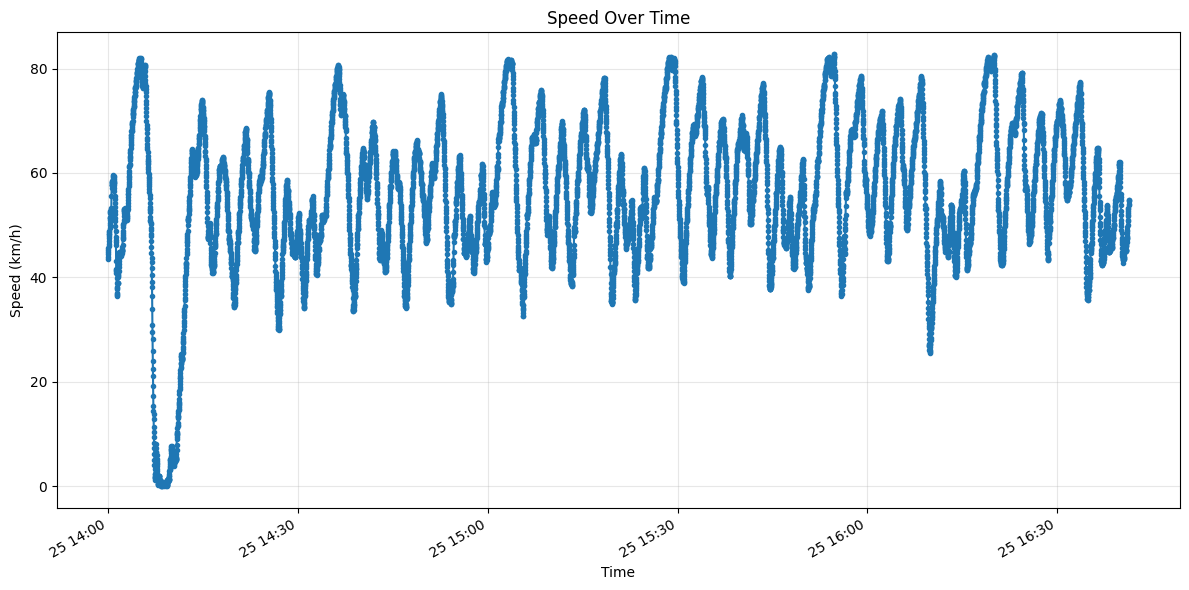

In [17]:
# Example with time (replace with your actual start time)
start = datetime.strptime("2025-12-25 14:00:00", "%Y-%m-%d %H:%M:%S")
plot_speeds(gps_speeds, start_time=start, time_interval=1)  # 1 second between measurements

In [18]:
def plot_speeds(gps_speeds, start_time=None, time_interval=1):
    """
    Plots GPS speeds over time or index, highlighting max speed and showing average speed.
    
    Args:
        gps_speeds: List of speed values in km/h
        start_time: (Optional) datetime object for the first data point.
                   If None, uses index numbers on x-axis.
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    plt.figure(figsize=(12, 6))
    
    # Calculate statistics
    max_speed = max(gps_speeds)
    avg_speed = sum(gps_speeds) / len(gps_speeds)
    max_idx = gps_speeds.index(max_speed)
    
    if start_time:
        # Create time points
        times = [start_time + timedelta(seconds=i*time_interval) 
                for i in range(len(gps_speeds))]
        x_values = times
        max_x = times[max_idx]
    else:
        x_values = range(len(gps_speeds))
        max_x = max_idx
    
    # Plot the main speed line
    line = plt.plot(x_values, gps_speeds, '-o', markersize=3, label='Speed', alpha=0.7)
    
    # Highlight max speed
    plt.scatter([max_x], [max_speed], color='red', s=100, zorder=5, 
               label=f'Max: {max_speed:.1f} km/h')
    
    # Add average speed line
    plt.axhline(y=avg_speed, color='green', linestyle='--', 
               label=f'Avg: {avg_speed:.1f} km/h')
    
    # Add labels and title
    if start_time:
        plt.gcf().autofmt_xdate()  # Auto-format time labels
        plt.xlabel('Time')
    else:
        plt.xlabel('Measurement Index')
    
    plt.ylabel('Speed (km/h)')
    title = 'Speed Over Time' if start_time else 'Speed vs Measurement Index'
    plt.title(f'{title}\nMax: {max_speed:.1f} km/h, Avg: {avg_speed:.1f} km/h')
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

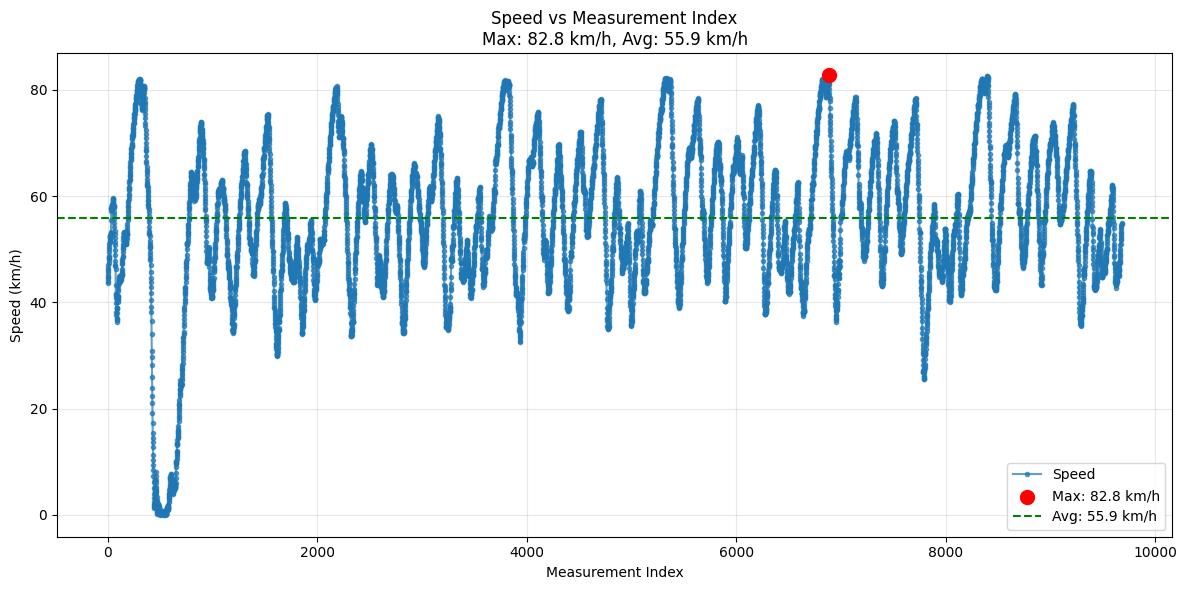

In [19]:
# With time
# plot_speeds(gps_speeds, start_time=your_start_time, time_interval=1)

# Or without time
plot_speeds(gps_speeds)

In [20]:
def calculate_and_plot_acceleration(gps_speeds, time_interval=1):
    """
    Calculates and plots acceleration from speed data.
    
    Args:
        gps_speeds: List of speed values in km/h
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    # Convert speeds from km/h to m/s for acceleration calculation (standard SI units)
    speeds_mps = [s / 3.6 for s in gps_speeds]
    
    # Calculate acceleration (dv/dt)
    accelerations = []
    for i in range(1, len(speeds_mps)):
        dv = speeds_mps[i] - speeds_mps[i-1]
        dt = time_interval  # seconds
        accelerations.append(dv / dt)  # m/s²
    
    # Calculate statistics
    max_accel = max(accelerations) if accelerations else 0
    min_accel = min(accelerations) if accelerations else 0
    avg_accel = sum(accelerations) / len(accelerations) if accelerations else 0
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Plot speed
    ax1.plot(gps_speeds, '-o', markersize=3, label='Speed', alpha=0.7)
    ax1.set_ylabel('Speed (km/h)')
    ax1.set_title('Speed and Acceleration Over Time')
    ax1.grid(True, alpha=0.3)
    
    # Plot acceleration
    ax2.plot(accelerations, '-o', markersize=3, color='orange', label='Acceleration', alpha=0.7)
    
    # Add zero line and average acceleration
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.axhline(y=avg_accel, color='green', linestyle='--', 
               label=f'Avg: {avg_accel:.2f} m/s²')
    
    # Highlight max acceleration
    max_idx = accelerations.index(max_accel)
    ax2.scatter([max_idx], [max_accel], color='red', s=100, zorder=5,
               label=f'Max: {max_accel:.2f} m/s²')
    
    # Highlight min acceleration (deceleration)
    min_idx = accelerations.index(min_accel)
    ax2.scatter([min_idx], [min_accel], color='blue', s=100, zorder=5,
               label=f'Min: {min_accel:.2f} m/s²')
    
    # Set labels and grid
    ax2.set_xlabel('Measurement Index')
    ax2.set_ylabel('Acceleration (m/s²)')
    ax2.grid(True, alpha=0.3)
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("Acceleration Statistics:")
    print(f"Maximum Acceleration: {max_accel:.2f} m/s²")
    print(f"Maximum Deceleration: {abs(min_accel):.2f} m/s² (braking)")
    print(f"Average Acceleration: {avg_accel:.2f} m/s²")

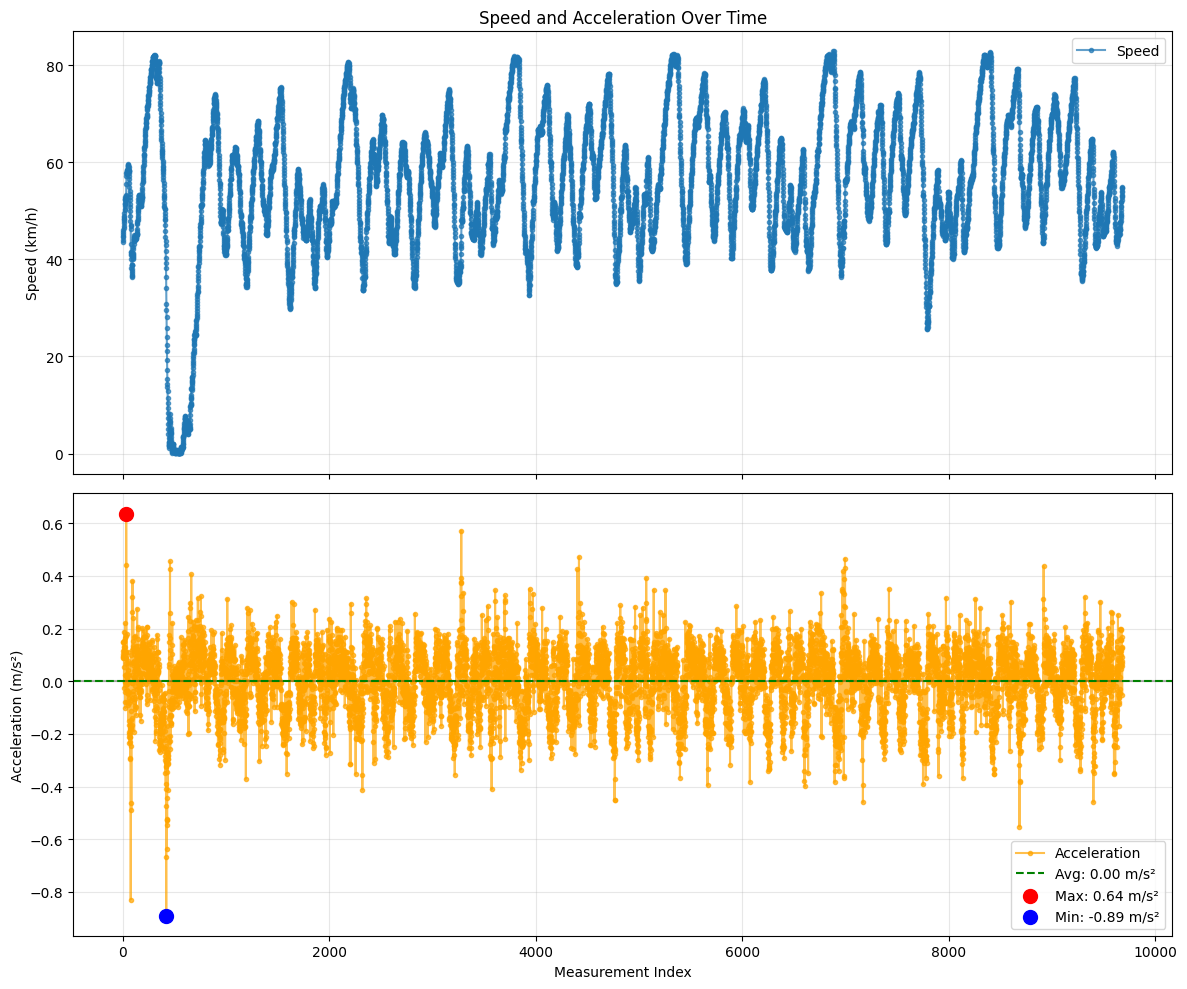

Acceleration Statistics:
Maximum Acceleration: 0.64 m/s²
Maximum Deceleration: 0.89 m/s² (braking)
Average Acceleration: 0.00 m/s²


In [21]:
calculate_and_plot_acceleration(gps_speeds, time_interval=1)  # Assuming 1 second between measurements

In [22]:
def analyze_acceleration_to_max_speed(gps_speeds, time_interval=1):
    """
    Analyzes acceleration from a point below 50 km/h to max speed.
    
    Args:
        gps_speeds: List of speed values in km/h
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    if not gps_speeds:
        print("No speed data provided.")
        return

    max_speed = max(gps_speeds)
    max_idx = gps_speeds.index(max_speed)
    
    # Find the first point below 50 km/h before max speed
    start_idx = None
    for i in range(max_idx - 1, -1, -1):
        if gps_speeds[i] <= 50:
            start_idx = i
            break
    
    if start_idx is None:
        print("Could not find a point below 50 km/h before the maximum speed.")
        return
    
    # Calculate time and distance of the acceleration phase
    time_to_max = (max_idx - start_idx) * time_interval
    start_speed = gps_speeds[start_idx]
    speed_difference = max_speed - start_speed
    
    # Calculate average acceleration (converting km/h to m/s)
    avg_accel = (speed_difference / 3.6) / time_to_max  # in m/s²
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot all speeds
    plt.plot(gps_speeds, '-', color='lightgray', label='Speed', alpha=0.5)
    
    # Highlight the acceleration phase
    acceleration_phase = range(start_idx, max_idx + 1)
    plt.plot(acceleration_phase, 
             gps_speeds[start_idx:max_idx + 1], 
             '-o', color='blue', 
             label='Acceleration Phase')
    
    # Mark key points
    plt.scatter([start_idx, max_idx], 
                [start_speed, max_speed], 
                color=['green', 'red'], s=100, zorder=5)
    
    # Add annotations
    plt.annotate(f'Start: {start_speed:.1f} km/h', 
                 (start_idx, start_speed),
                 textcoords="offset points", 
                 xytext=(10,10), 
                 ha='left')
    
    plt.annotate(f'Max: {max_speed:.1f} km/h', 
                 (max_idx, max_speed),
                 textcoords="offset points", 
                 xytext=(10,-15), 
                 ha='left')
    
    # Add title and labels
    plt.title(f'Acceleration Analysis\n'
              f'Average Acceleration: {avg_accel:.2f} m/s² from {start_speed:.1f} km/h to {max_speed:.1f} km/h\n'
              f'Time: {time_to_max:.1f} seconds')
    
    plt.xlabel('Measurement Index')
    plt.ylabel('Speed (km/h)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    # Print detailed results
    print("="*60)
    print("ACCELERATION ANALYSIS")
    print("="*60)
    print(f"Starting speed: {start_speed:.1f} km/h at index {start_idx}")
    print(f"Maximum speed: {max_speed:.1f} km/h at index {max_idx}")
    print(f"Time to accelerate: {time_to_max:.1f} seconds")
    print(f"Average acceleration: {avg_accel:.2f} m/s²")
    print("="*60)
    
    plt.show()

ACCELERATION ANALYSIS
Starting speed: 49.8 km/h at index 6676
Maximum speed: 82.8 km/h at index 6883
Time to accelerate: 207.0 seconds
Average acceleration: 0.04 m/s²


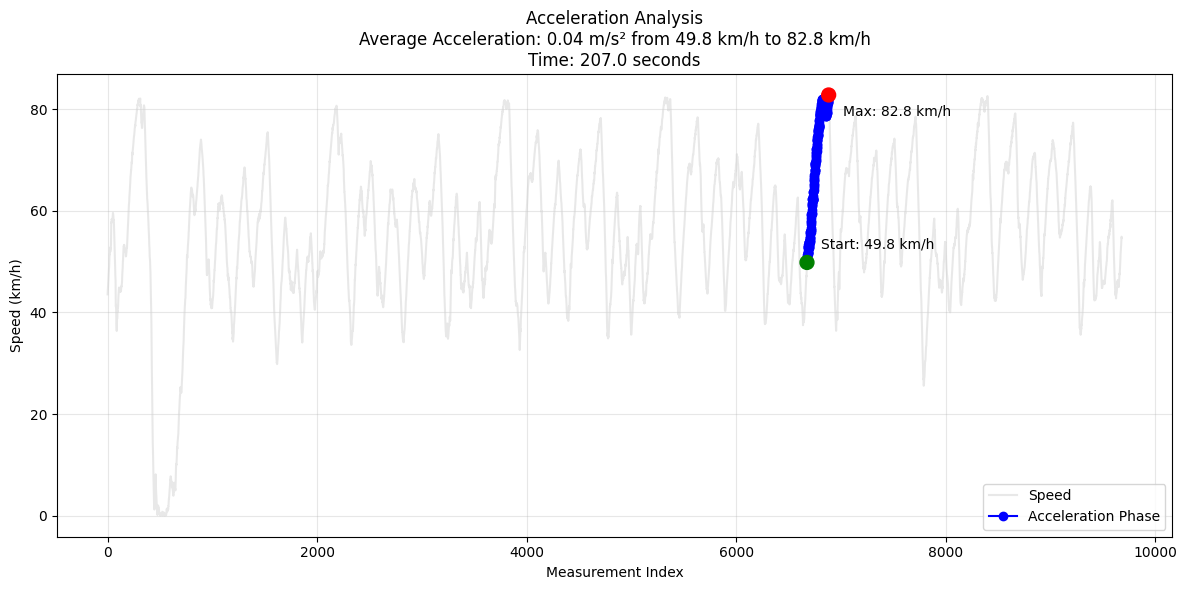

In [23]:
analyze_acceleration_to_max_speed(gps_speeds, time_interval=1)